### Importing the libraries required

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
%matplotlib inline

### Importing the dataset 

In [28]:
df=pd.read_csv(r'/Users/Sravya/Downloads/datasets_19_420_Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Obtaining the characteristics of the dataset 


In [78]:
df.drop(['Id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [79]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Paiplot of the various characterstics described 

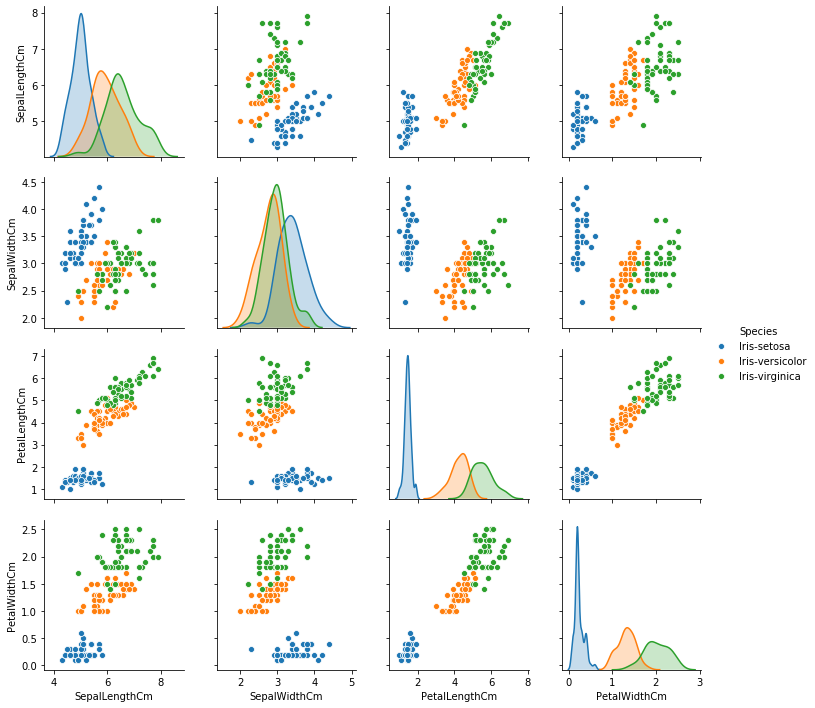

In [80]:
sns.pairplot(df, hue='Species')

### Subplot of the features  

Text(0.5, 1.0, 'Petal Width (cm)')

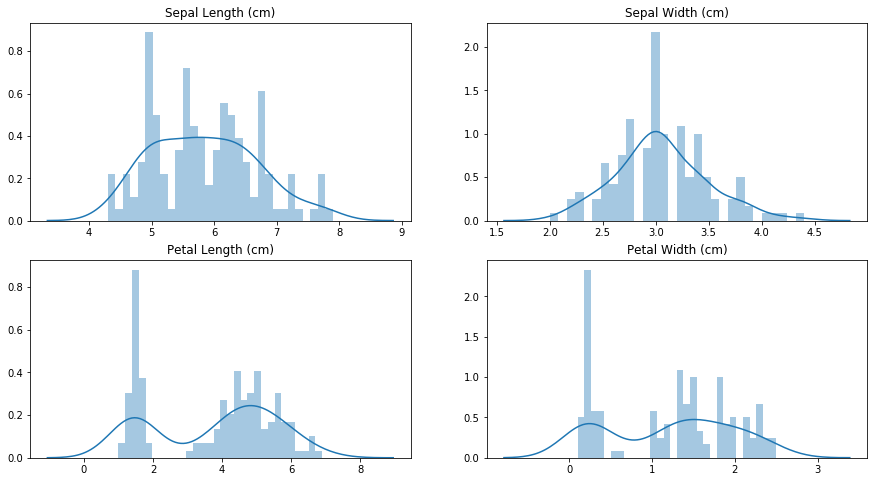

In [81]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'].values,bins=30)
plt.title('Sepal Length (cm)')
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'].values,bins=30)
plt.title('Sepal Width (cm)')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'].values,bins=30)
plt.title('Petal Length (cm)')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'].values,bins=30)
plt.title('Petal Width (cm)')

### Preparing the dataset, finding dependent and independent variable 

In [82]:
X=df.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
y=df.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [84]:
lbe=LabelEncoder()
y=lbe.fit_transform(y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Applying Decision Tree Classifier 

In [100]:
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
y_pred=dc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### Finding the accuracy and confusion matrix of the model

In [102]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [103]:
print("Confusion Matrix is=")
print(metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix is=
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


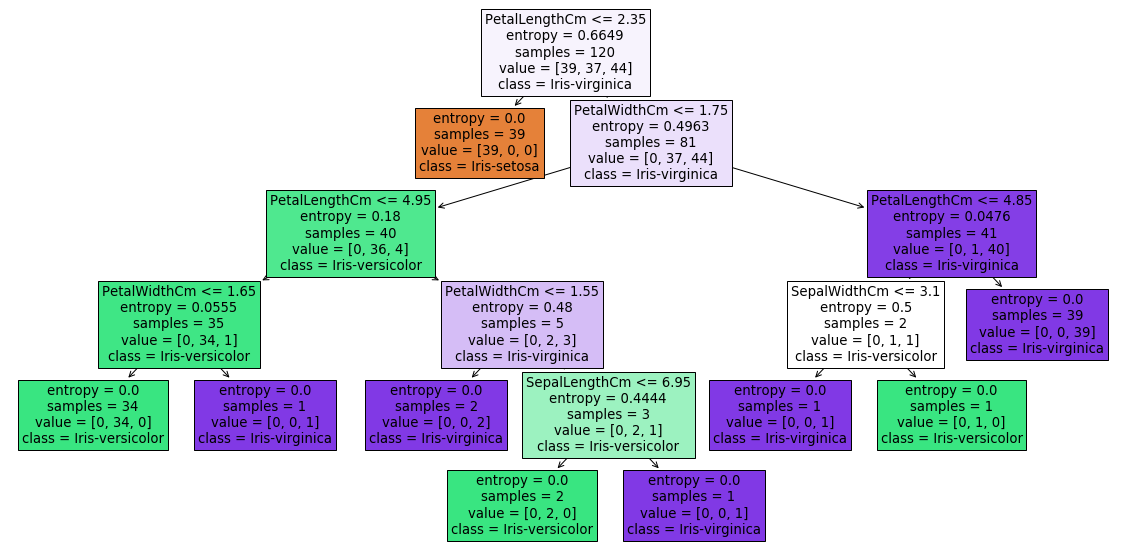

In [104]:
plt.figure(figsize=(20,10))
tree_img=plot_tree(dc,feature_names=df.columns,class_names=df['Species'].unique().tolist(),precision=4,label="all",filled=True)
plt.show()